<h1 style="background-color:yellow;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Vehicle Identification</h1>


<center><img src="https://i.ytimg.com/vi/uD8kWFaL9_g/maxresdefault.jpg",height='500',width='600'></center>


<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">OverView </h1>
<a id=0></a>

In this dataset our main objective is to predict if there is a vehicle in the image or not. There are about 17k images of dimension (64x64x3).

Two labels:

Non-Vehicles
Vehicles

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Importing modules and Loading datasets</h1>
<a id=1></a>

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras 
from glob import glob
from keras.models import Sequential
from keras.layers import BatchNormalization,MaxPool2D,Dense,Conv2D,Flatten
from keras.callbacks import EarlyStopping,LearningRateScheduler
import warnings
from tqdm import tqdm
from PIL import Image
warnings.filterwarnings('ignore')

In [2]:
df=pd.DataFrame(columns=['image','label'])


In [3]:

# for a picture containing image of vehicle label is 1.

idx=0
for name in tqdm(glob('../input/vehicle-detection-image-set/data/vehicles/*')):
    image=Image.open(name)
    img_seq=image.getdata()
    img=np.array(img_seq)
    img=np.reshape(img,(64,64,3))
    data=pd.DataFrame({'image':[img],'label':[1]},index=[idx])
    df=df.append(data)    
    idx+=1

100%|██████████| 8792/8792 [01:39<00:00, 88.14it/s]


In [4]:
# for a picture doesn't contain image of vehicle label is 0.

for name in tqdm(glob('../input/vehicle-detection-image-set/data/non-vehicles/*')):
    image=Image.open(name)
    img_seq=image.getdata()
    img=np.array(img_seq)
    img=np.reshape(img,(64,64,3))
    data=pd.DataFrame({'image':[img],'label':[0]},index=[idx]) 
    df=df.append(data)
    idx+=1

100%|██████████| 8968/8968 [01:46<00:00, 84.31it/s]


<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Train test spliting of data</h1>
<a id=2></a>

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
split=StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)
for train_index,test_index in split.split(df,df['label']):
    train_data=df.iloc[train_index]
    test_data=df.iloc[test_index]
# train_x,test_x,train_y,test_y=train_test_split(df['image'],df['label'],random_state=42,test_size=0.15)

In [6]:
train_img,train_label=train_data['image'],train_data['label']
test_img,test_label=test_data['image'],test_data['label']

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Data Visualization</h1>
<a id=3></a>

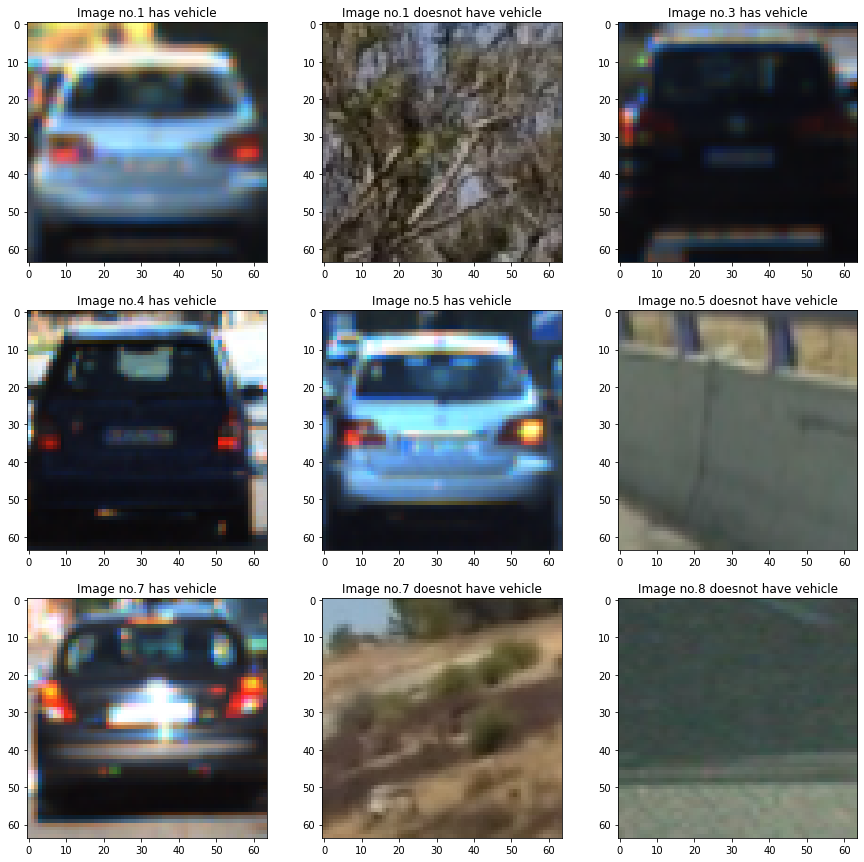

In [7]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,(i%9)+1)
    ix=np.random.randint(3000)
    if(train_label.iloc[ix]==1):
        plt.title('Image no.{0} has vehicle'.format(i+1))
    elif(train_label.iloc[ix]==0):
        plt.title('Image no.{0} doesnot have vehicle'.format(i))
    plt.imshow(train_img.iloc[ix])
plt.show()

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Changing Dimension Of Data</h1>
<a id=4></a>

In [8]:
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),64,64,3))
    return data

In [9]:
train_img=change_image_dimension(train_img)
test_img=change_image_dimension(test_img)
# train_img
train_img=train_img/255.0
test_img=test_img/255.0

In [10]:
train_label=np.array(train_label,dtype=int)
test_label=np.array(test_label,dtype=int)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Callback Functions</h1>
<a id=5></a>

In [11]:
def schedule(epoch,lr):
    if epoch>=5:
        return 0.0001
    return 0.001
early_stop=EarlyStopping(monitor='val_accuracy',patience=3)
learning_rate_scheduler=LearningRateScheduler(schedule)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Convolutional Neural Network</h1>
<a id=5></a>

In [12]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
r=model.fit(train_img,train_label,validation_data=(test_img,test_label),epochs=10,batch_size=100,callbacks=[early_stop,learning_rate_scheduler])

Epoch 1/10
151/151 [==============================] - 6s 25ms/step - loss: 0.1486 - accuracy: 0.9339 - val_loss: 4.5876 - val_accuracy: 0.5049
Epoch 2/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0319 - accuracy: 0.9886 - val_loss: 6.3010 - val_accuracy: 0.5049
Epoch 3/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 1.7395 - val_accuracy: 0.6423
Epoch 4/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0142 - accuracy: 0.9946 - val_loss: 0.0551 - val_accuracy: 0.9820
Epoch 5/10
151/151 [==============================] - 3s 18ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0759 - val_accuracy: 0.9816
Epoch 6/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0170 - val_accuracy: 0.9951
Epoch 7/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0149 - val_accuracy: 0.9966

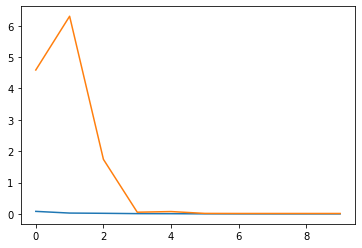

In [15]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

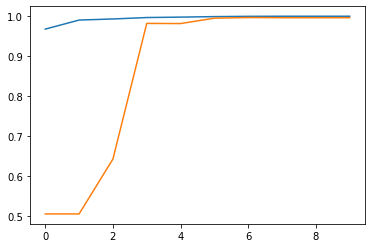

In [16]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Visualization of Predicted Data</h1>
<a id=3></a>

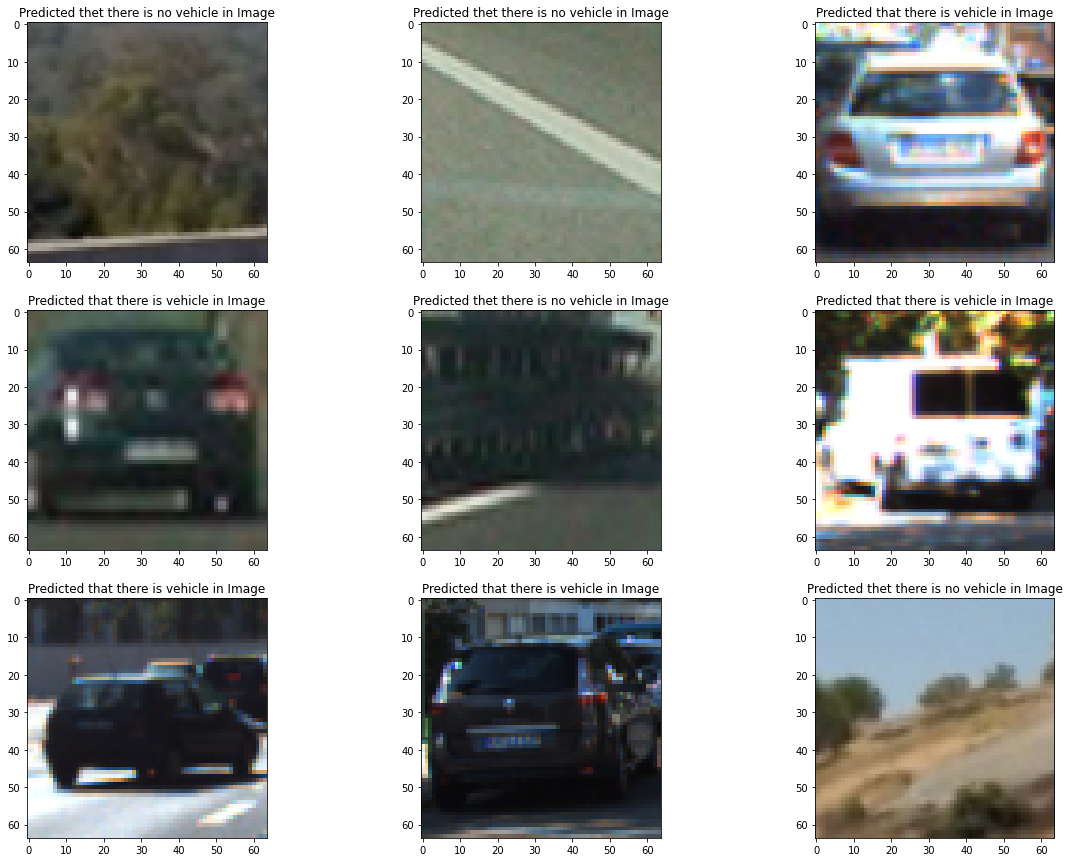

In [17]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(3,3,(i%9)+1)
    rd_idx=np.random.randint(700)
    pred_test=model.predict_classes(np.reshape(test_img[rd_idx],(-1,64,64,3)))
    if pred_test==1:
        plt.title('Predicted that there is vehicle in Image')
    else:
        plt.title('Predicted thet there is no vehicle in Image')
    plt.imshow(test_img[rd_idx])
plt.show()


<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Conclusion</h1>
<a id=3></a>

## Here we find that the model works quite well with accuracy of 99.99% on training dataset and 99.62% on test dataset.
## Thus this model is apt to identify the vehicles.

<h1 style="background-color:#ff00ff;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 15px;padding: 3px">If You like the notebook, don't forget to upvote it. And if you have any doubt feel free to Ask in comment section.</h1>
<a id=3></a>